In [1]:
import os
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from math import pi
import plancklens
from plancklens import utils, n0s
from plancklens import nhl
from plancklens.n1 import n1
from plancklens import qest, qecl, qresp
import matplotlib as mpl
import glob, pandas as pd

from orphics import maps, cosmology
mpl.rcParams['font.size']=12

In [2]:
exps_config = {
    'CMB_S3': {
        'nlev_t': 7,
        'nlev_p':7*2**0.5,
        'beam_arcmin': 1.4,
        'result_nums': [0, 20, 40, 60, 80]
    },
    'CMB_S4': {
        'nlev_t': 1,
        'nlev_p':2**0.5,
        'beam_arcmin': 1.4,
        'result_nums': [90, 110, 130, 150, 170]
    }
}

In [3]:
def load_n1aa(Acb="1e-08", expt="S4"):
    files = glob.glob(f"../output/N1aa/N1aa_*_{Acb}_CMB_{expt}*.dat")
    n1aa = []
    for f in files:
        n1aa.append(np.loadtxt(f))
    n1aa = np.mean(n1aa, axis=0)[30:3001]
    return n1aa

In [4]:
n1aa_S4_n6 = load_n1aa(Acb="1e-06", expt="S4")
n1aa_S4_n7 = load_n1aa(Acb="1e-07", expt="S4")
n1aa_S4_n8 = load_n1aa(Acb="1e-08", expt="S4")

n1aa_S3_n6 = load_n1aa(Acb="1e-06", expt="S3")
n1aa_S3_n7 = load_n1aa(Acb="1e-07", expt="S3")
n1aa_S3_n8 = load_n1aa(Acb="1e-08", expt="S3")

In [5]:
ell = np.arange(30, 3001, 1)
# load input
clpp_input = np.loadtxt("../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat")[30:3001,5]
clkk = 2*np.pi/4*clpp_input
clpp = clpp_input / ((ell*(ell+1))**2 / (2*np.pi))

In [6]:
class bin1D(object):
    def __init__(self, ls, bin_edges):
        self.centers = (bin_edges[1:]+bin_edges[:-1])/2.
        self.digitized = np.digitize(ls, bin_edges,right=True)
        self.bin_edges = bin_edges
    def bin(self,data1d,weights=None):
        if weights is None:
            res = np.bincount(self.digitized,(data1d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
        else:
            res = np.bincount(self.digitized,(data1d*weights).reshape(-1))[1:-1]/np.bincount(self.digitized,weights.reshape(-1))[1:-1]
        return self.centers,res

# %%
# bin results
bin_edge = np.arange(30, 3000, 150)
binner = bin1D(ell, bin_edge)

In [7]:
ell_bin, n1aa_S4_n6_bin = binner.bin(n1aa_S4_n6 / clpp)
ell_bin, n1aa_S4_n7_bin = binner.bin(n1aa_S4_n7 / clpp)
ell_bin, n1aa_S4_n8_bin = binner.bin(n1aa_S4_n8 / clpp)

ell_bin, n1aa_S3_n6_bin = binner.bin(n1aa_S3_n6 / clpp)
ell_bin, n1aa_S3_n7_bin = binner.bin(n1aa_S3_n7 / clpp)
ell_bin, n1aa_S3_n8_bin = binner.bin(n1aa_S3_n8 / clpp)

In [8]:
# load n1aa_planck data
ell_plancklens = np.arange(30, 3001)
n1aa_plancklens_S4_n6 = np.loadtxt('../output/N1aa_plancklens/N1aa_2.5plancklens_1e-06_CMB_S4_30_3000.dat')
n1aa_plancklens_S4_n7 = np.loadtxt('../output/N1aa_plancklens/N1aa_2.5plancklens_1e-07_CMB_S4_30_3000.dat')
n1aa_plancklens_S4_n8 = np.loadtxt('../output/N1aa_plancklens/N1aa_2.5plancklens_1e-08_CMB_S4_30_3000.dat')

n1aa_plancklens_S3_n6 = np.loadtxt('../output/N1aa_plancklens/N1aa_2.5plancklens_1e-06_CMB_S3_30_3000.dat')
n1aa_plancklens_S3_n7 = np.loadtxt('../output/N1aa_plancklens/N1aa_2.5plancklens_1e-07_CMB_S3_30_3000.dat')
n1aa_plancklens_S3_n8 = np.loadtxt('../output/N1aa_plancklens/N1aa_2.5plancklens_1e-08_CMB_S3_30_3000.dat')

In [9]:
ell_bin, n1aa_plancklens_S4_n6_bin = binner.bin(n1aa_plancklens_S4_n6[ell_plancklens]/ clpp)
ell_bin, n1aa_plancklens_S4_n7_bin = binner.bin(n1aa_plancklens_S4_n7[ell_plancklens]/ clpp)
ell_bin, n1aa_plancklens_S4_n8_bin = binner.bin(n1aa_plancklens_S4_n8[ell_plancklens]/ clpp)

ell_bin, n1aa_plancklens_S3_n6_bin = binner.bin(n1aa_plancklens_S3_n6[ell_plancklens]/ clpp)
ell_bin, n1aa_plancklens_S3_n7_bin = binner.bin(n1aa_plancklens_S3_n7[ell_plancklens]/ clpp)
ell_bin, n1aa_plancklens_S3_n8_bin = binner.bin(n1aa_plancklens_S3_n8[ell_plancklens]/ clpp)

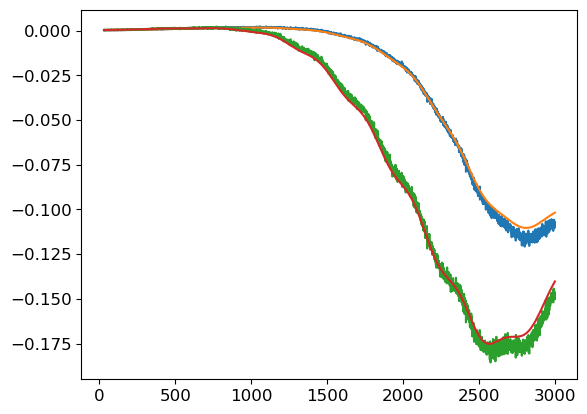

In [10]:
plt.plot(ell_plancklens, n1aa_S4_n6/clpp)
plt.plot(ell_plancklens, n1aa_plancklens_S4_n6[ell_plancklens]/clpp)

plt.plot(ell_plancklens, n1aa_S3_n6/clpp)
plt.plot(ell_plancklens, n1aa_plancklens_S3_n6[ell_plancklens]/clpp)

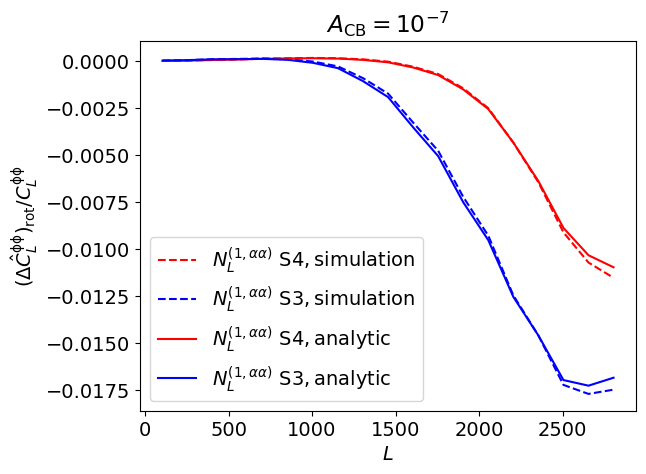

In [12]:
plt.plot(ell_bin, n1aa_S4_n7_bin, 'r--', label=r'$N^{(1, \alpha \alpha)}_{L}\ \mathrm{S4, simulation}$')
plt.plot(ell_bin, n1aa_S3_n7_bin, 'b--', label=r'$N^{(1, \alpha \alpha)}_{L}\ \mathrm{S3, simulation}$')

plt.plot(ell_bin, n1aa_plancklens_S4_n7_bin, 'r', label=r'$N^{(1, \alpha \alpha)}_{L}\ \mathrm{S4, analytic}$')
plt.plot(ell_bin, n1aa_plancklens_S3_n7_bin, 'b', label=r'$N^{(1, \alpha \alpha)}_{L}\ \mathrm{S3, analytic}$')

plt.rcParams["font.size"] = 14
plt.title(r"$A_{\rm CB}=10^{-7}$")
plt.legend(loc="best")
plt.xlabel("$L$")
plt.ylabel('$(\Delta \hat{{C}}^{\mathrm{\phi \phi}}_{L})_{\mathrm{rot}}/C^{\mathrm{\phi \phi}}_{L}$')
plt.savefig('N1aa_plancklens.pdf', bbox_inches="tight")

In [13]:
# consider the domain wall scenario with different spectra index?
ns = [1.0, 0.95, 0.9, 1.05, 1.10]
n1aa_1_S4_n7 = np.loadtxt('../output/N1aa_plancklens/N1aa_1_2.5plancklens_1e-07_CMB_S4_30_3000.dat') 
n1aa_095_S4_n7 = np.loadtxt('../output/N1aa_plancklens/N1aa_0.95_2.5plancklens_1e-07_CMB_S4_30_3000.dat')
n1aa_090_S4_n7 = np.loadtxt('../output/N1aa_plancklens/N1aa_0.90_2.5plancklens_1e-07_CMB_S4_30_3000.dat') 
n1aa_105_S4_n7 = np.loadtxt('../output/N1aa_plancklens/N1aa_1.05_2.5plancklens_1e-07_CMB_S4_30_3000.dat') 
n1aa_110_S4_n7 = np.loadtxt('../output/N1aa_plancklens/N1aa_1.10_2.5plancklens_1e-07_CMB_S4_30_3000.dat') 

In [14]:
ell_bin, n1aa_1_S4_n7_bin = binner.bin(n1aa_1_S4_n7[ell_plancklens]/ clpp)
ell_bin, n1aa_095_S4_n7_bin = binner.bin(n1aa_095_S4_n7[ell_plancklens]/ clpp)
ell_bin, n1aa_090_S4_n7_bin = binner.bin(n1aa_090_S4_n7[ell_plancklens]/ clpp)
ell_bin, n1aa_105_S4_n7_bin = binner.bin(n1aa_105_S4_n7[ell_plancklens]/ clpp)
ell_bin, n1aa_110_S4_n7_bin = binner.bin(n1aa_110_S4_n7[ell_plancklens]/ clpp)

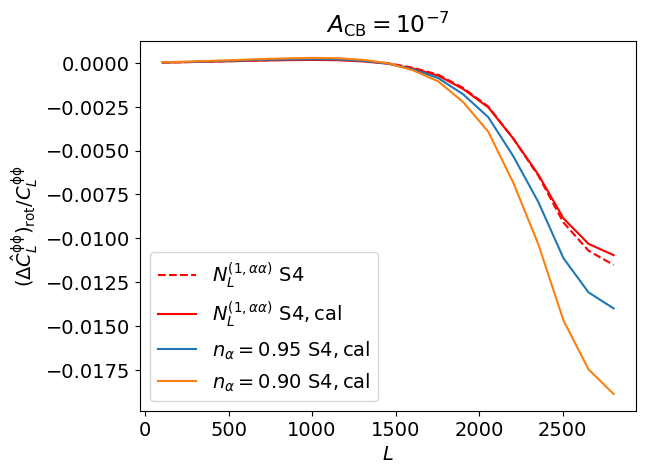

In [15]:
plt.plot(ell_bin, n1aa_S4_n7_bin, 'r--', label=r'$N^{(1, \alpha \alpha)}_{L}\ \mathrm{S4}$')
plt.plot(ell_bin, n1aa_plancklens_S4_n7_bin, 'r', label=r'$N^{(1, \alpha \alpha)}_{L}\ \mathrm{S4,cal}$')
# plt.plot(ell_bin, n1aa_1_S4_n7_bin, label='1')
plt.plot(ell_bin, n1aa_095_S4_n7_bin, label=r'$n_{\alpha}=0.95\ \mathrm{S4,cal}$')
plt.plot(ell_bin, n1aa_090_S4_n7_bin, label=r'$n_{\alpha}=0.90\ \mathrm{S4,cal}$')
plt.legend(loc="best")
plt.rcParams["font.size"] = 14
plt.title(r"$A_{\rm CB}=10^{-7}$")
plt.xlabel("$L$")
plt.ylabel('$(\Delta \hat{{C}}^{\mathrm{\phi \phi}}_{L})_{\mathrm{rot}}/C^{\mathrm{\phi \phi}}_{L}$')
plt.savefig('N1aa_plancklens_n.pdf', bbox_inches="tight")

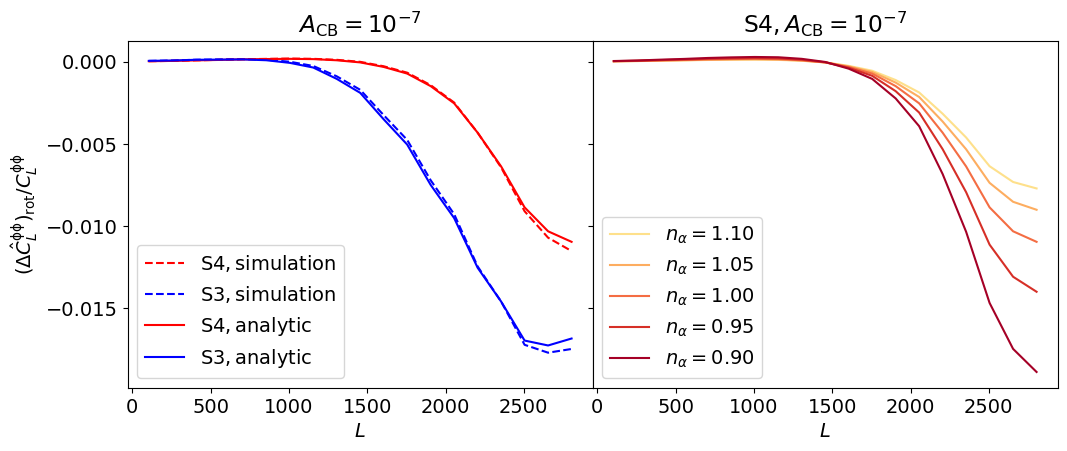

In [17]:
fig, ax = plt.subplots(1, 2,figsize=(6*2,4.5*1), sharey='row')
ax[0].plot(ell_bin, n1aa_S4_n7_bin, 'r--', label=r'$\mathrm{S4, simulation}$')
ax[0].plot(ell_bin, n1aa_S3_n7_bin, 'b--', label=r'$\mathrm{S3, simulation}$')
ax[0].plot(ell_bin, n1aa_plancklens_S4_n7_bin, 'r', label=r'$\mathrm{S4,analytic}$')
ax[0].plot(ell_bin, n1aa_plancklens_S3_n7_bin, 'b', label=r'$\mathrm{S3,analytic}$')
ax[0].legend(loc="best")
#ax[0].legend(loc="lower left")
# plt.rcParams["font.size"] = 14
ax[0].set_title(r"$A_{\rm CB}=10^{-7}$")
ax[0].set_xlabel("$L$")
ax[0].set_ylabel('$(\Delta \hat{{C}}^{\mathrm{\phi \phi}}_{L})_{\mathrm{rot}}/C^{\mathrm{\phi \phi}}_{L}$')

# ax[1].plot(ell_bin, n1aa_S4_n7_bin, 'r--', label=r'$\mathrm{S4}$')
# ax[1].plot(ell_bin, n1aa_plancklens_S4_n7_bin, 'r', label=r'$n_{\alpha}=1.0$')
# ax[1].plot(ell_bin, n1aa_095_S4_n7_bin, label=r'$n_{\alpha}=0.95$')
# ax[1].plot(ell_bin, n1aa_090_S4_n7_bin, label=r'$n_{\alpha}=0.9$')
# ax[1].plot(ell_bin, n1aa_105_S4_n7_bin, label=r'$n_{\alpha}=1.05$')
# ax[1].plot(ell_bin, n1aa_110_S4_n7_bin, label=r'$n_{\alpha}=1.10$')

# Define the colormap
cmap = plt.cm.RdYlGn  # Choose a colormap (e.g., RdYlGn, viridis, etc.)

# Define the alpha values for each plot
alphas = [0.9, 0.95, 1.0, 1.05, 1.10]

# Plot the data with gradient colors
for i, (alpha, data) in enumerate(zip(alphas[::-1], [n1aa_090_S4_n7_bin, n1aa_095_S4_n7_bin, n1aa_plancklens_S4_n7_bin, n1aa_105_S4_n7_bin, n1aa_110_S4_n7_bin][::-1])):
    color = cmap((alpha-0.9)*2)  # Get the color from the colormap based on the alpha value
    ax[1].plot(ell_bin, data, color=color, label=r'$n_{\alpha}='+f'{alpha:.2f}$')

# Set the legend
# ax[1].legend()


ax[1].legend(loc="best")
# plt.rcParams["font.size"] = 14
ax[1].set_title(r"$\mathrm{S4}, A_{\rm CB}=10^{-7}$")
ax[1].set_xlabel("$L$")
# ax[1].set_ylabel('$(\Delta \hat{{C}}^{\mathrm{\phi \phi}}_{L})_{\mathrm{rot}}/C^{\mathrm{\phi \phi}}_{L}$')
fig.subplots_adjust(wspace=0)
plt.savefig('N1aa_plancklens_both.pdf', bbox_inches="tight")